In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
Data=pd.read_csv("ANN.csv",sep=";",decimal=",")
x=Data.drop(["y1","y2","y3"],axis=1).values
x = np.column_stack((x, np.ones(x.shape[0])*-1)) # Agregar los umbrales
y=Data.drop(["x1","x2"],axis=1).values
np.random.seed(10)
#l2_delta=l2_error*sigmoid(l2,deriv=True)
#w0

In [8]:
# Definición de la función de transferencia
def sigmoid ( x,deriv=False):
    if deriv == True:
        return x*(1-x)
    return 1/(1+np.exp(-x))

# Definición de los pesos iniciales

w0 = 2*np.random.random((2,3)) - 1 # Entrada-Oculta
w0 = np.row_stack((w0, np.ones(3)*-1))

w1=2*np.random.random((3,3))-1 # Oculta-Salida
a=[]
for i in range(2000):
    l0=x
    l1=sigmoid(np.dot(l0,w0))
    l2=sigmoid(np.dot(l1,w1))
    
    l2_error= y-l2
    
    if (i%100)==0:
        a.append(np.mean(np.abs(l2_error)))
        print(f'Error: {np.mean(np.abs(l2_error))}')
    l2_delta=l2_error*sigmoid(l2,deriv=True)
    
    # Contribución de L1 a L2
    
    l1_error=np.dot(l2_delta,w1.T)
    l1_delta=l1_error*sigmoid(l1,deriv=True)
    
    # Actualización de pesos
    
    w1+=np.dot(l1.T,l2_delta)
    w0+=np.dot(l0.T, l1_delta)

#print("Despúes de entrenar")
print(l2)


Error: 0.4915221479564818
Error: 0.06806100656147568
Error: 0.03974112717267228
Error: 0.030733758123757726
Error: 0.025925660719867082
Error: 0.022828805640017942
Error: 0.020623811643242406
Error: 0.01895208538261193
Error: 0.017628800895150797
Error: 0.01654783304791674
Error: 0.015643361227226024
Error: 0.014872124188615138
Error: 0.014204370240340899
Error: 0.013618880014614029
Error: 0.013100060119708675
Error: 0.012636161225186968
Error: 0.012218140365234663
Error: 0.011838909253388525
Error: 0.011492822857044099
Error: 0.011175322482100855
[[ 0.98568755  0.00978345  0.0119597 ]
 [ 0.98877576  0.01187026  0.00756515]
 [ 0.00793524  0.98699124  0.01055759]
 [ 0.0080638   0.98743062  0.01030637]
 [ 0.01143335  0.00901908  0.98626004]
 [ 0.01104865  0.00883445  0.98729298]]


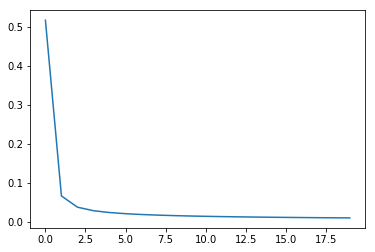

In [7]:
plt.plot(a)
plt.show()